In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
import dateutil
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')

## Reading Data


In [2]:
data = pd.read_csv('/home/simran/Data analysis/covid.csv')

In [3]:
data['ObservationDate'] = pd.to_datetime(data['ObservationDate']).dt.date  #Remove timestamp 00.00.0000

In [4]:
data.head()  #shows first 5 rows

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [5]:
data.shape

(3395, 8)

In [6]:
data.describe() #gives summary

,SNo,Confirmed,Deaths,Recovered
count,3395.000000,3395.000000,3395.000000,3395.000000
mean,1698.000000,611.823859,17.756112,167.704271
std,980.196409,5121.319656,187.195366,1650.055341
min,1.000000,0.000000,0.000000,0.000000
25%,849.500000,2.000000,0.000000,0.000000
50%,1698.000000,10.000000,0.000000,1.000000
75%,2546.500000,120.500000,1.000000,18.000000
max,3395.000000,67332.000000,2871.000000,38557.000000


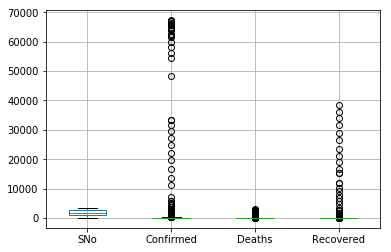

In [7]:
data.boxplot()

# Data visualization

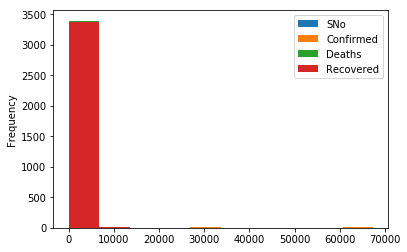

In [8]:
data.plot.hist()

In [9]:
data.isnull() #Checking null values

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False


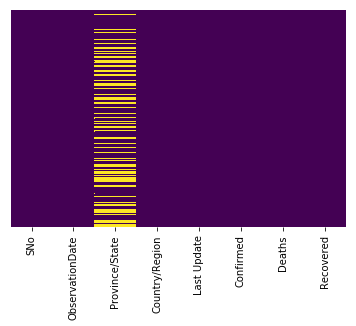

In [10]:
#Plotting null values using sns
sns.heatmap(data.isnull(), yticklabels=False, cbar= False, cmap='viridis')

Mostly empty at province, so analysis will be primararly based on Country.
Next is analyzing each column.

THINGS TO ANALYZE
1) Observation dates - this will give the frequency of cases updated in a particular date
2) No of countries affected
3) Cases confirmed from each country
4) Deaths and Recovered

In [11]:
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


Using Seaborn to visualize columns

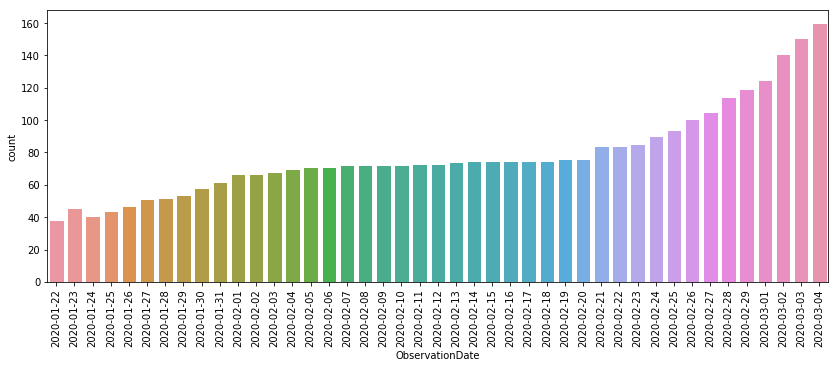

In [12]:
plt.figure(figsize=(14,5))  #adjusts the x & y axis
plt.xticks(rotation=90) #Helps in adjusting x-ticks
sns.set_style('whitegrid')  #gives a white grid
sns.countplot(x='ObservationDate' , data=data ) #counting the given column
# Here count is the number of cases being reported


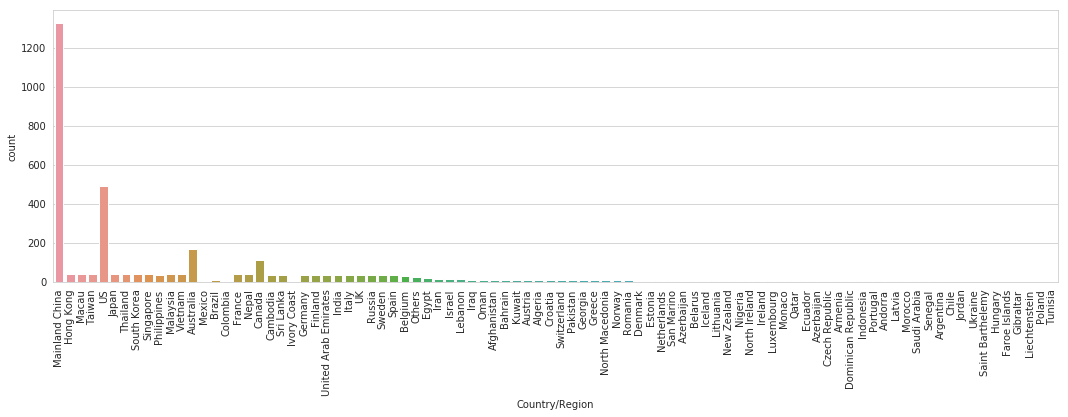

In [13]:
plt.figure(figsize=(18,5))
plt.xticks(rotation=90)
sns.set_style('whitegrid')
sns.countplot(x='Country/Region', data=data)

In [14]:
to_delete = data[data['Confirmed'] == 0].index  #Removing 0 from 'confirmed'
data.drop(to_delete , inplace=True)

In [15]:
data.head(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
5,6,2020-01-22,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,7,2020-01-22,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,8,2020-01-22,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,9,2020-01-22,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,10,2020-01-22,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
11,12,2020-01-22,Henan,Mainland China,1/22/2020 17:00,5.0,0.0,0.0


In [16]:
#data = data.sort_values('Country/Region') #Sorts in alphabetical order

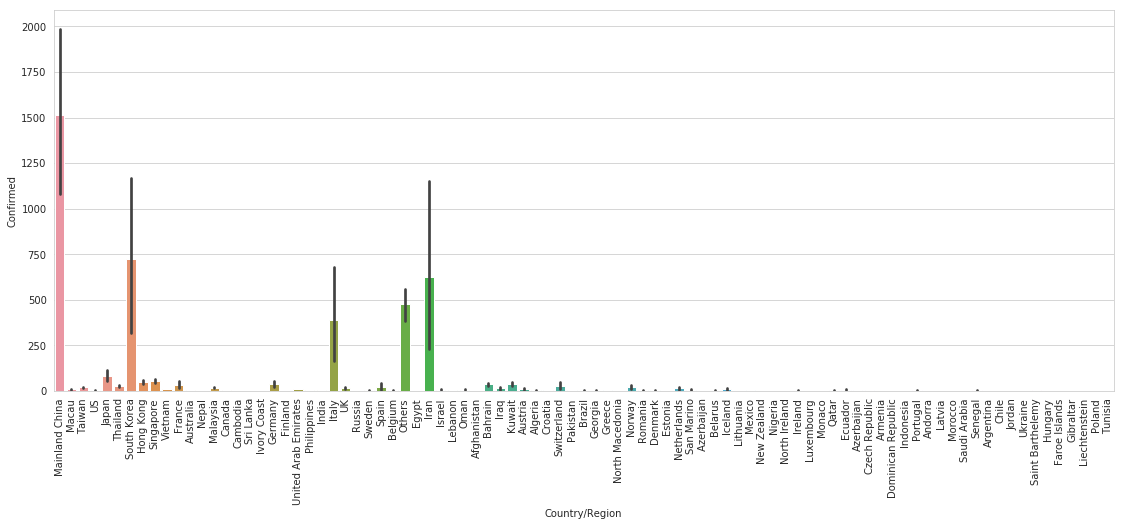

In [17]:
plt.figure(figsize=(19,7))
plt.xticks(rotation=90)
sns.set_style('whitegrid')
sns.barplot(x='Country/Region', y='Confirmed', data=data)

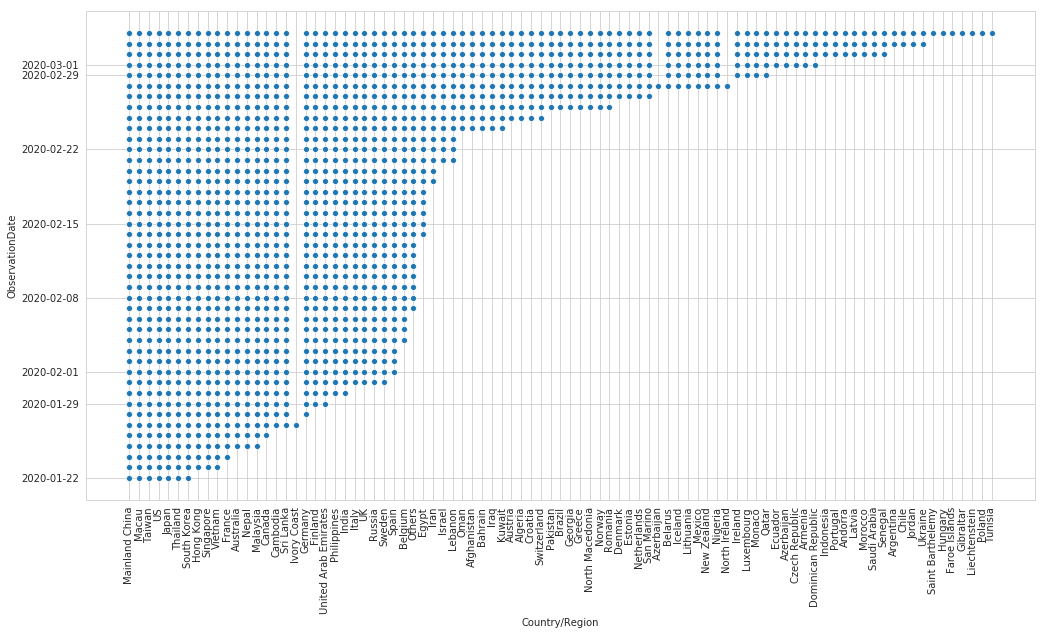

In [18]:
#scatterplot to plot date.time format
plt.figure(figsize=(17,9)) 
plt.xticks(rotation=90)
sns.set_style('whitegrid')
sns.scatterplot(x='Country/Region', y='ObservationDate', data=data)

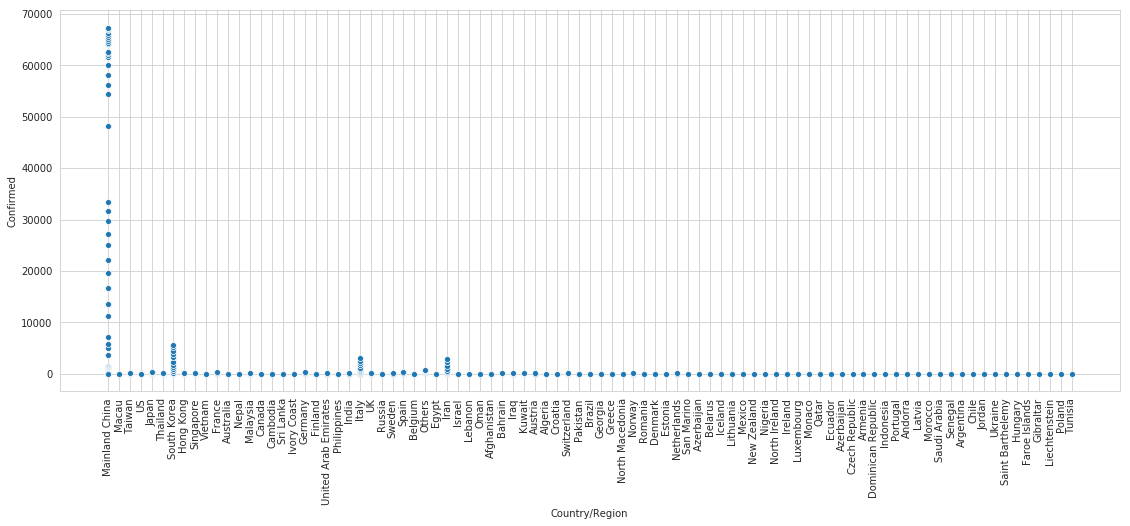

In [19]:
plt.figure(figsize=(19,7))
plt.xticks(rotation=90)
sns.set_style('whitegrid')
sns.scatterplot(x='Country/Region', y='Confirmed', data=data)

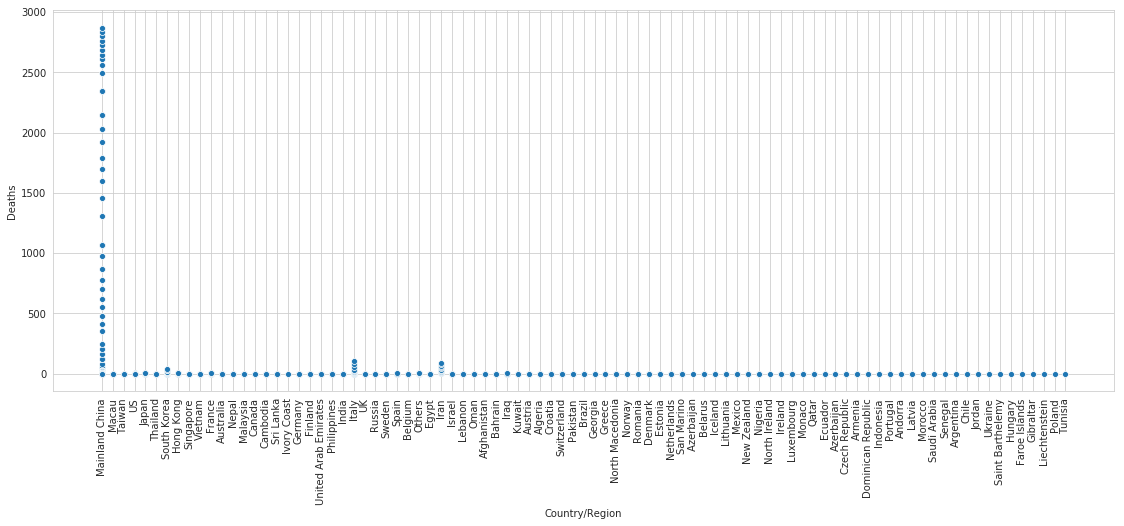

In [20]:
plt.figure(figsize=(19,7))
plt.xticks(rotation=90)

sns.scatterplot(x='Country/Region', y='Deaths', data=data)

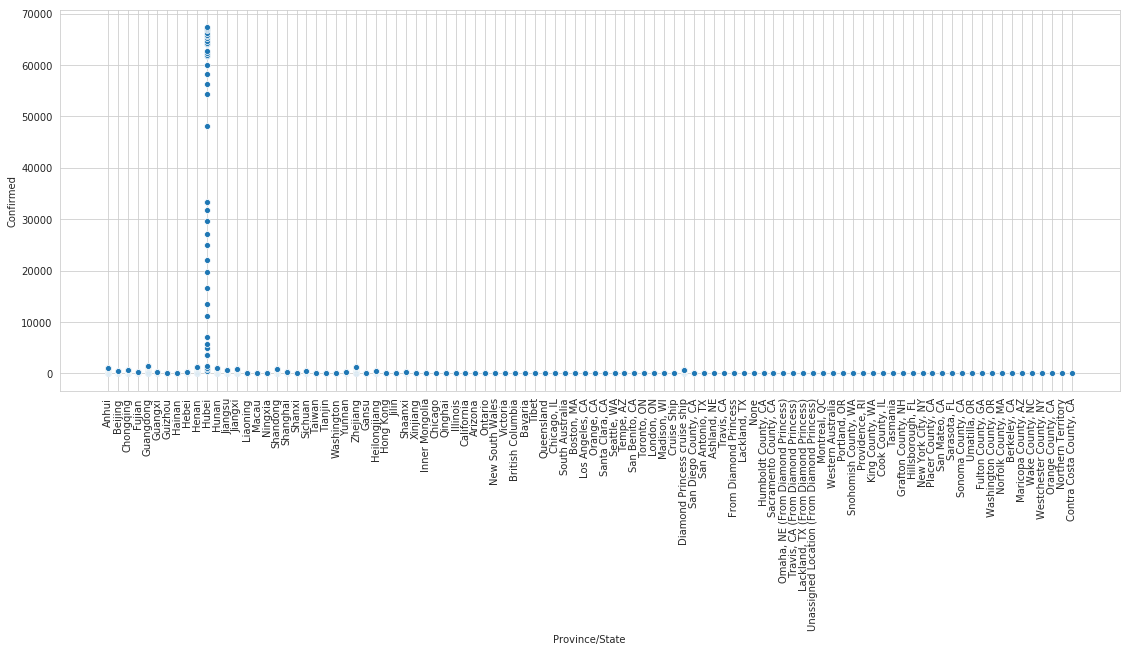

In [21]:
plt.figure(figsize=(19,7))
plt.xticks(rotation=90)

sns.scatterplot(x='Province/State', y='Confirmed', data=data)

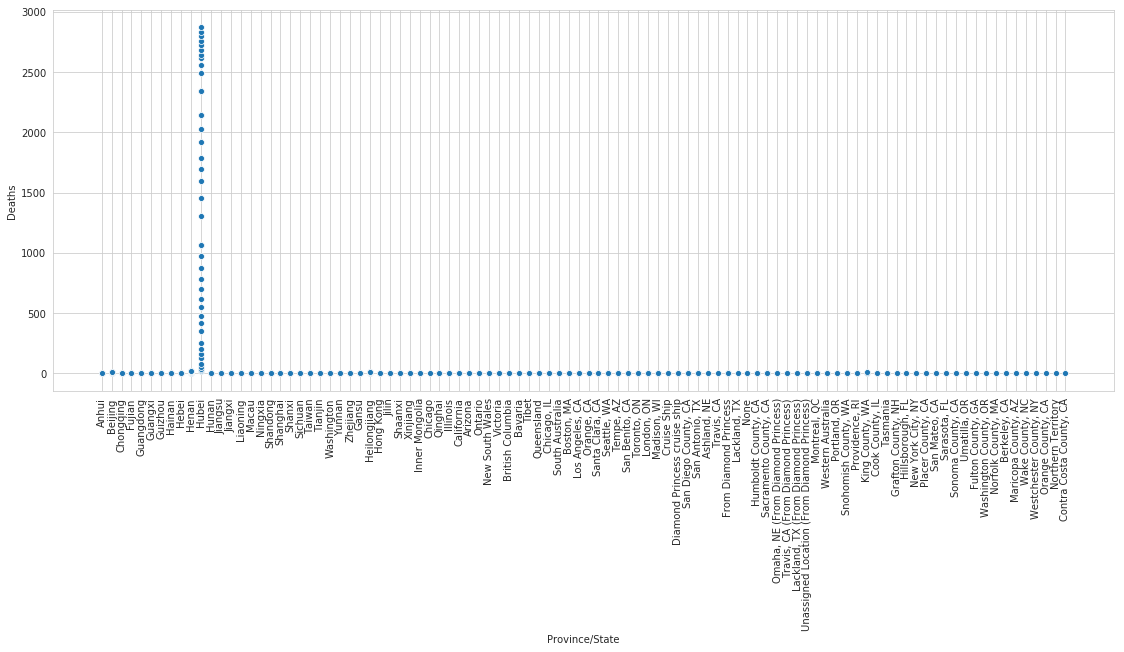

In [22]:
plt.figure(figsize=(19,7))
plt.xticks(rotation=90)

sns.scatterplot(x='Province/State', y='Deaths', data=data)

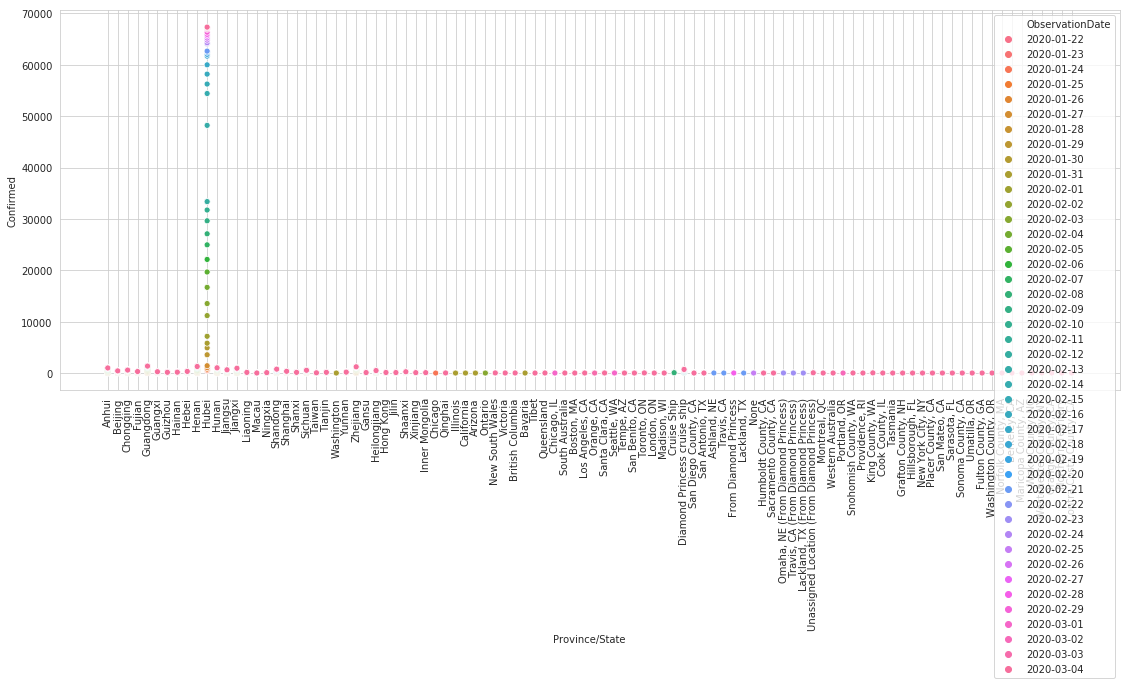

In [23]:
plt.figure(figsize=(19,7))
plt.xticks(rotation=90)

sns.scatterplot(x='Province/State', y='Confirmed',hue='ObservationDate', data=data)

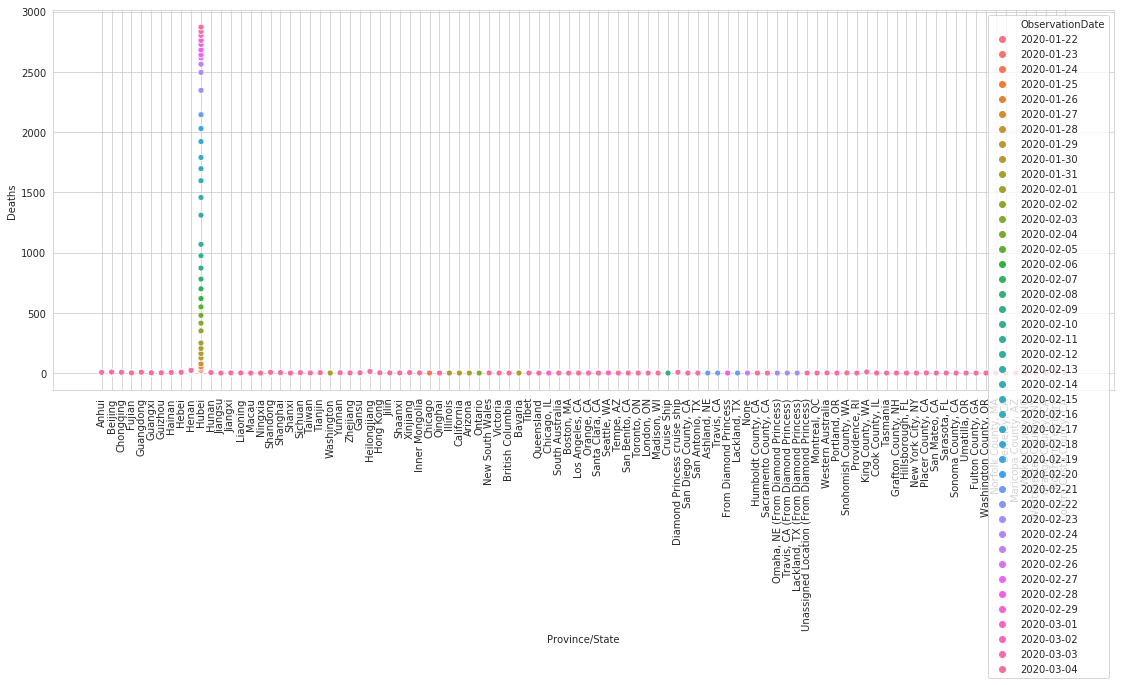

In [24]:
plt.figure(figsize=(19,7))
plt.xticks(rotation=90)

sns.scatterplot(x='Province/State', y='Deaths',hue='ObservationDate', data=data)

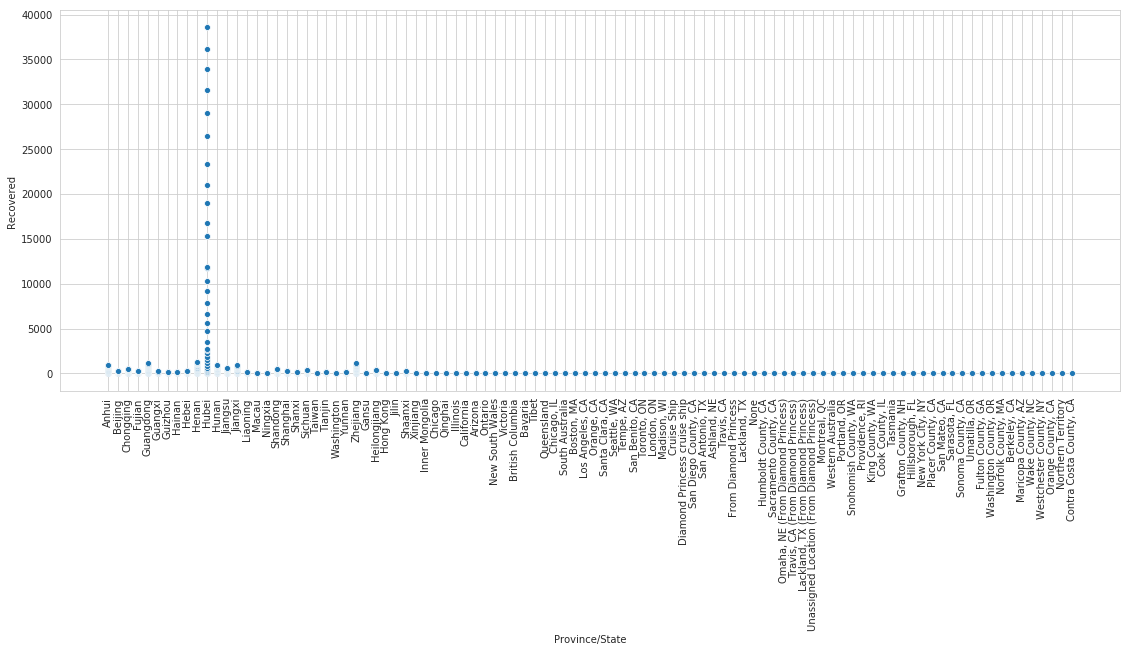

In [25]:
plt.figure(figsize=(19,7))
plt.xticks(rotation=90)

sns.scatterplot(x='Province/State', y='Recovered', data=data)

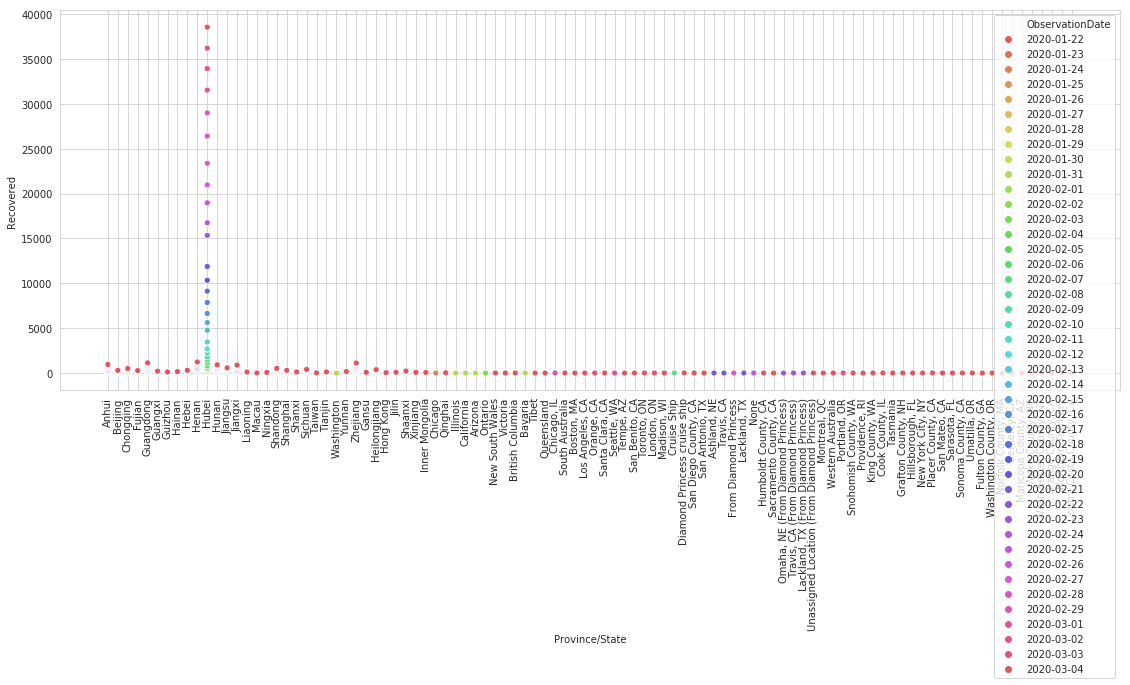

In [26]:
plt.figure(figsize=(19,7))
plt.xticks(rotation=90)

sns.scatterplot(x='Province/State', y='Recovered',hue='ObservationDate',palette='hls', data=data)

In [27]:
data2 = data.loc[data['Country/Region'] == 'Mainland China']
data2.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
5,6,2020-01-22,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0


In [28]:
#data.head(30)

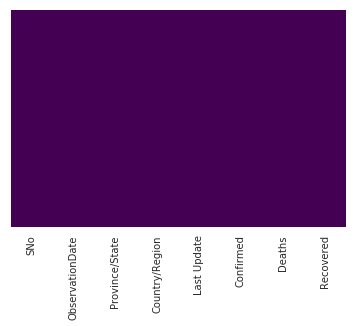

In [29]:
#Plotting null values in data2 using sns
sns.heatmap(data2.isnull(), yticklabels=False, cbar= False, cmap='viridis')

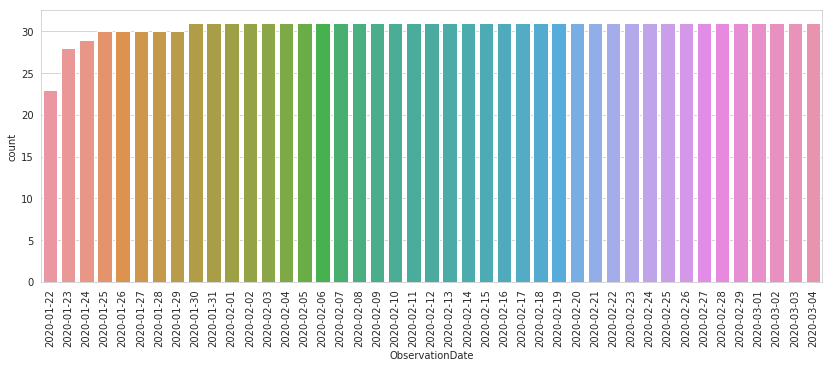

In [30]:
plt.figure(figsize=(14,5))  #adjusts the x & y axis
plt.xticks(rotation=90) #Helps in adjusting x-ticks
sns.set_style('whitegrid')  #gives a white grid
sns.countplot(x='ObservationDate' , data=data2 ) #counting the given column
# Here count is the number of cases being reported

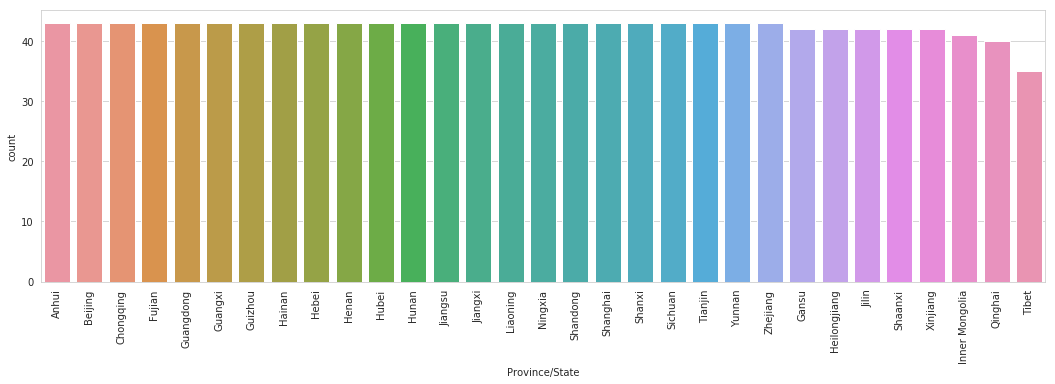

In [31]:
#Divide the dataset into train and test 
#also data and labels
plt.figure(figsize=(18,5))
plt.xticks(rotation=90)
sns.set_style('whitegrid')
sns.countplot(x='Province/State', data=data2)


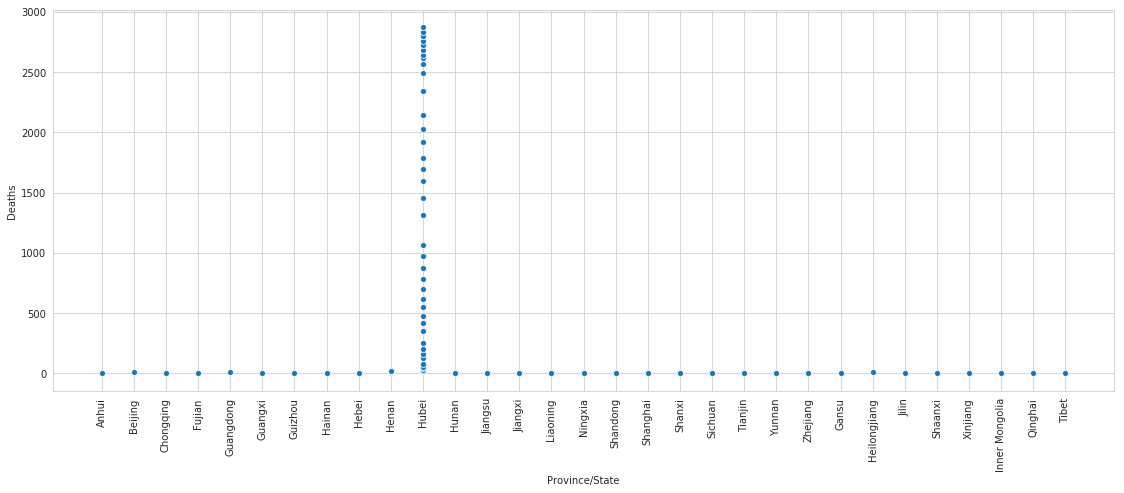

In [32]:
plt.figure(figsize=(19,7))
plt.xticks(rotation=90)

sns.scatterplot(x='Province/State', y='Deaths', data=data2)

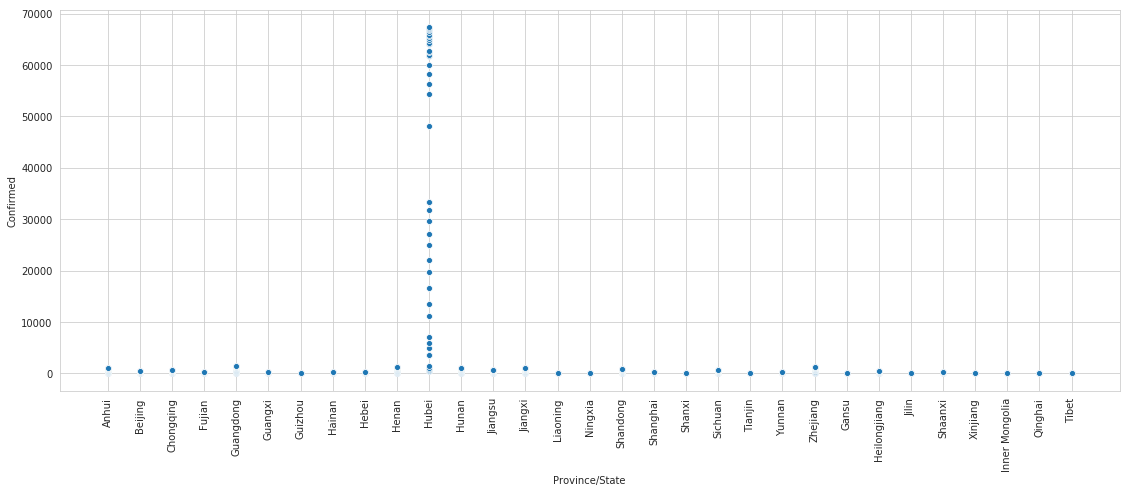

In [33]:
plt.figure(figsize=(19,7))
plt.xticks(rotation=90)

sns.scatterplot(x='Province/State', y='Confirmed', data=data2)

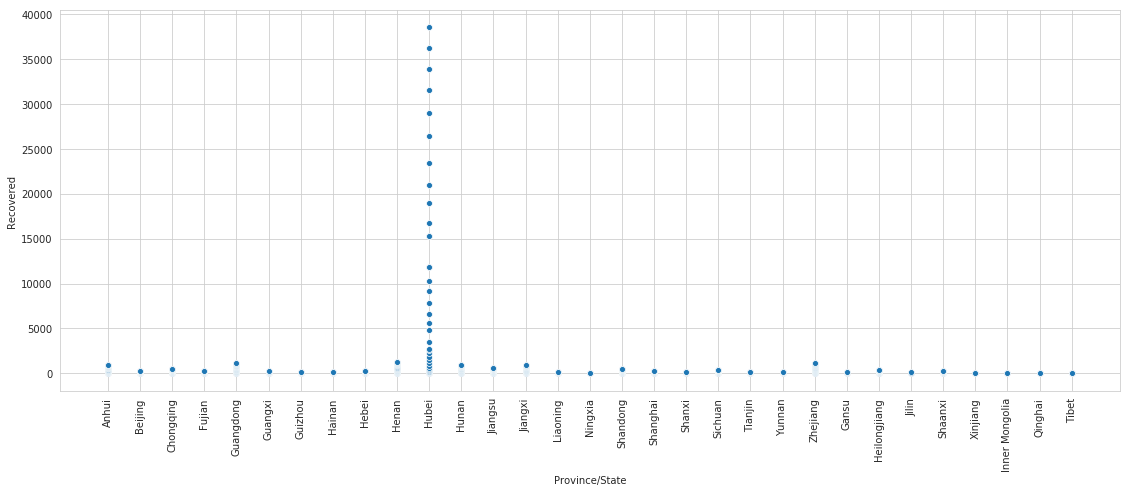

In [34]:
plt.figure(figsize=(19,7))
plt.xticks(rotation=90)

sns.scatterplot(x='Province/State', y='Recovered', data=data2)

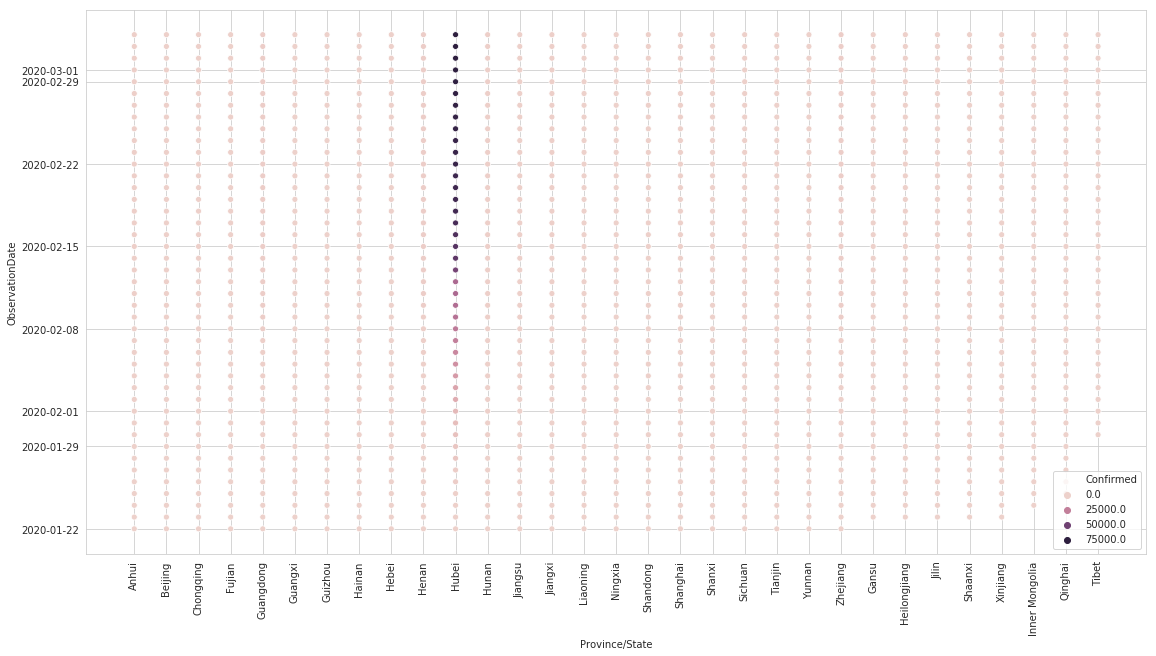

In [35]:
plt.figure(figsize=(19,10))
plt.xticks(rotation=90)

sns.scatterplot(x='Province/State', y='ObservationDate',hue='Confirmed', data=data2)

In [36]:
#other data set
